# ****MULTIPLE LINEAR REGRESSION****

## ****Assignment Task:****
Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.


## ****Dataset Description:****

The dataset consists of the following variables:

Age: Age in years

KM: Accumulated Kilometers on odometer

FuelType: Fuel Type (Petrol, Diesel, CNG)

HP: Horse Power

Automatic: Automatic ( (Yes=1, No=0)

CC: Cylinder Volume in cubic centimeters

Doors: Number of doors

Weight: Weight in Kilograms

Quarterly_Tax: 

Price: Offer Price in EUROs


importing libraries 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df=pd.read_csv("F:\\DATA SCIENCE_ExcelR\\Assignments\\MLR\\ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [9]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [11]:
df.shape

(1436, 11)

we are having 1436 rows and 11 columns

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


we are having Fuel_Type as categorical and remaining all are numerica data from info()

In [17]:
df["Automatic"].value_counts()

Automatic
0    1356
1      80
Name: count, dtype: int64

In [19]:
df["Doors"].value_counts()

Doors
5    674
3    622
4    138
2      2
Name: count, dtype: int64

In [21]:
df["Cylinders"].value_counts()

Cylinders
4    1436
Name: count, dtype: int64

In [23]:
df["Gears"].value_counts()

Gears
5    1390
6      43
3       2
4       1
Name: count, dtype: int64

now when we check seperately we can see automatic,doors,gears are like discrete variables and cylinders with only one unique value

statistical summary 

In [686]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


checking for null values

In [688]:
df.isna().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

ther are no missing values 

## ****Tasks:****

### 1. Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

EDA:

Histograms

Box plots

Bar plots

Scatter plots


### Histograms

Skewness in price:  1.7038849799952995


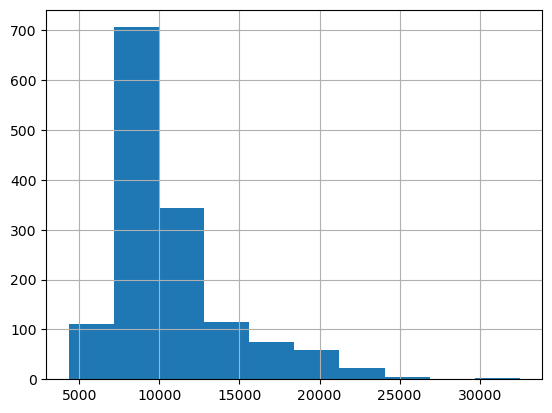

In [695]:
df["Price"].hist()
print("Skewness in price: ",df["Price"].skew())

Price is positive skewness

skewness of Age_08_04 :  -0.82670187309842


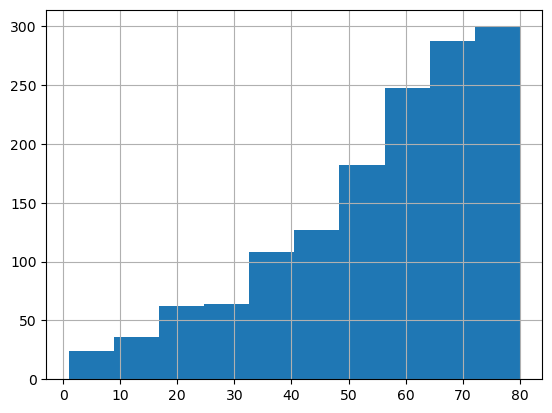

In [698]:
df["Age_08_04"].hist()
print("skewness of Age_08_04 : ",df["Age_08_04"].skew())

Age is slight negative skewed but its distribution is almost equal to normal so its symmetrical

skewness in Kilometers:  1.0159121980877577


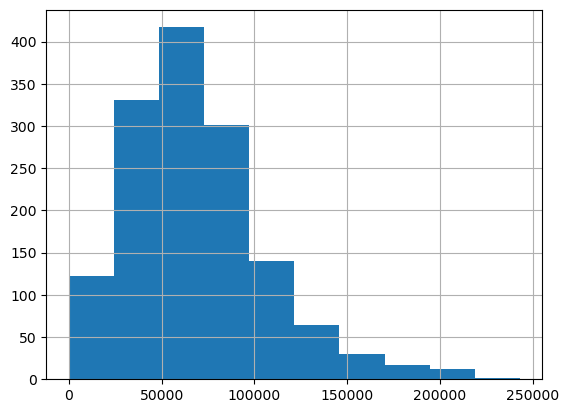

In [701]:
df["KM"].hist()
print("skewness in Kilometers: ",df['KM'].skew())

km is positively skewed

skewness in HP:  0.9558356472519488


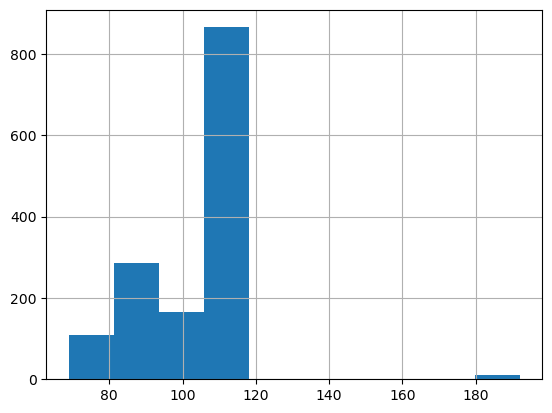

In [704]:
df["HP"].hist()
print("skewness in HP: ",df['HP'].skew())

hp is slight positive skewed and its close to 0 so we can say symmetrical 

skewness in cc:  27.431792795981686


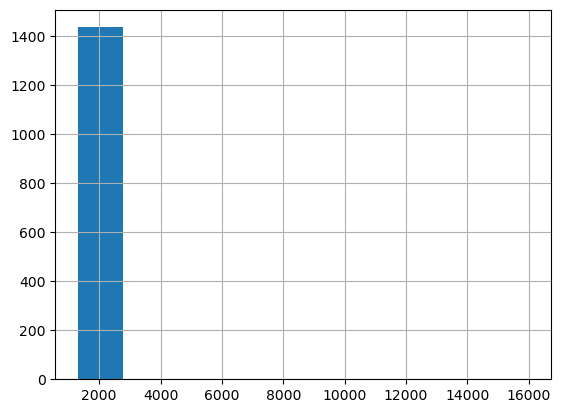

In [707]:
df["cc"].hist()
print("skewness in cc: ",df['cc'].skew())

cc have  positive skewness 

skewness in Weight:  3.108639394626062


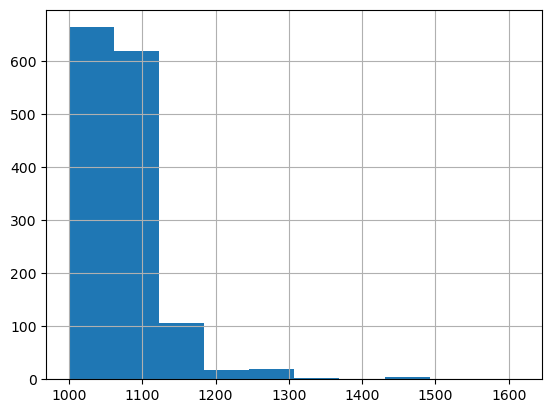

In [710]:
df["Weight"].hist()
print("skewness in Weight: ",df['Weight'].skew())

weight haves positive skewness

### box plots

<Axes: title={'center': 'price'}>

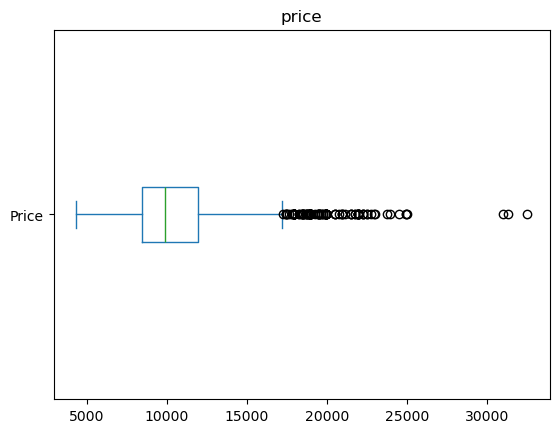

In [714]:
df["Price"].plot(kind='box',vert=False,title='price')

In [716]:
Q1=np.percentile(df["Price"],25)
Q3=np.percentile(df["Price"],75)
IQR=Q3-Q1
UWL=Q3+(1.5*IQR)
LWL=Q1-(1.5*IQR)
outliers=df[(df["Price"]>UWL) | (df["Price"]<LWL)]
print("Outliers in Price: ",len(outliers))
print("Outlier percentage: ",(len(outliers)/len(df))*100)

Outliers in Price:  110
Outlier percentage:  7.66016713091922


<Axes: title={'center': 'age'}>

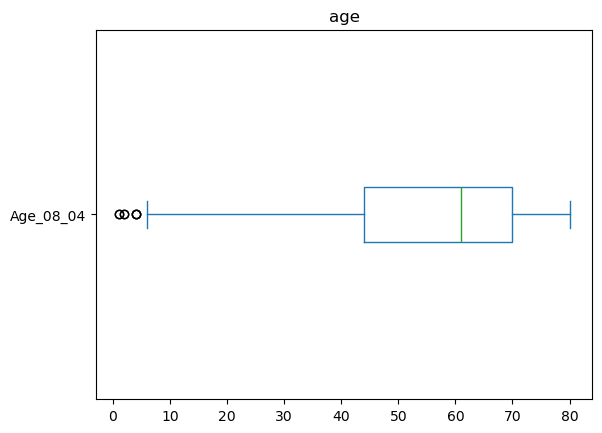

In [718]:
df["Age_08_04"].plot(kind='box',vert=False,title='age')

In [720]:
Q1=np.percentile(df["Age_08_04"],25)
Q3=np.percentile(df["Age_08_04"],75)
IQR=Q3-Q1
UWL=Q3+(1.5*IQR)
LWL=Q1-(1.5*IQR)
outliers=df[(df["Age_08_04"]>UWL) | (df["Age_08_04"]<LWL)]
print("Outliers in age: ",len(outliers))
print("Outlier percentage: ",(len(outliers)/len(df))*100)

Outliers in age:  7
Outlier percentage:  0.48746518105849584


<Axes: title={'center': 'km'}>

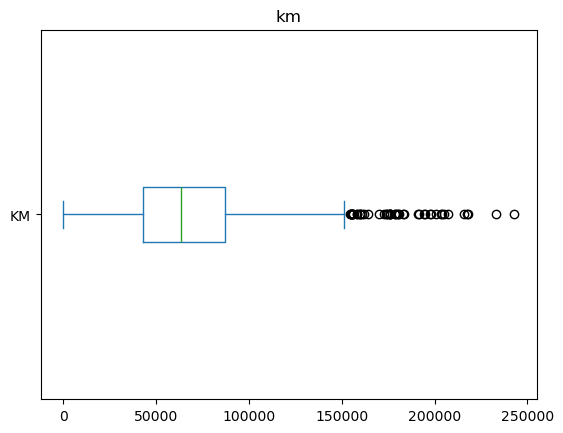

In [722]:
df["KM"].plot(kind='box',vert=False,title='km')

In [724]:
Q1=np.percentile(df["KM"],25)
Q3=np.percentile(df["KM"],75)
IQR=Q3-Q1
UWL=Q3+(1.5*IQR)
LWL=Q1-(1.5*IQR)
outliers=df[(df["KM"]>UWL) | (df["KM"]<LWL)]
print("Outliers in km: ",len(outliers))
print("Outlier percentage: ",(len(outliers)/len(df))*100)

Outliers in km:  49
Outlier percentage:  3.4122562674094707


<Axes: title={'center': 'hp'}>

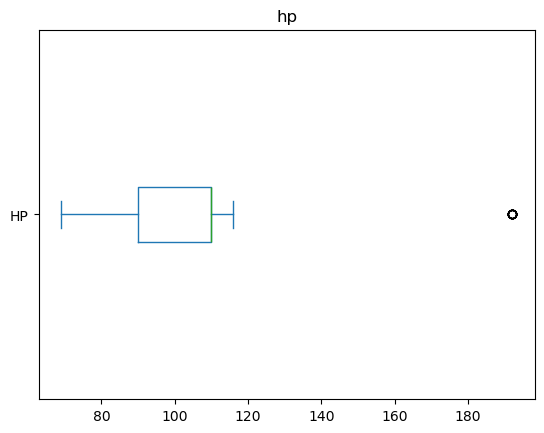

In [726]:
df["HP"].plot(kind='box',vert=False,title='hp')

In [727]:
Q1=np.percentile(df["HP"],25)
Q3=np.percentile(df["HP"],75)
IQR=Q3-Q1
UWL=Q3+(1.5*IQR)
LWL=Q1-(1.5*IQR)
outliers=df[(df["HP"]>UWL) | (df["HP"]<LWL)]
print("Outliers in HP: ",len(outliers))
print("Outlier percentage: ",(len(outliers)/len(df))*100)

Outliers in HP:  11
Outlier percentage:  0.766016713091922


<Axes: title={'center': 'cc'}>

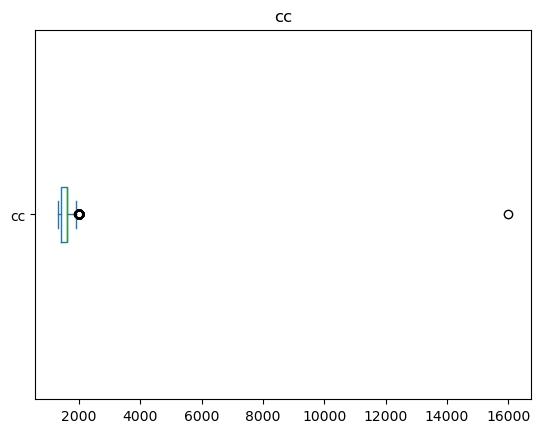

In [728]:
df["cc"].plot(kind='box',vert=False,title='cc')

In [729]:
Q1=np.percentile(df["cc"],25)
Q3=np.percentile(df["cc"],75)
IQR=Q3-Q1
UWL=Q3+(1.5*IQR)
LWL=Q1-(1.5*IQR)
outliers=df[(df["cc"]>UWL) | (df["cc"]<LWL)]
print("Outliers in cc: ",len(outliers))
print("Outlier percentage: ",(len(outliers)/len(df))*100)

Outliers in cc:  123
Outlier percentage:  8.565459610027855


<Axes: title={'center': 'weight'}>

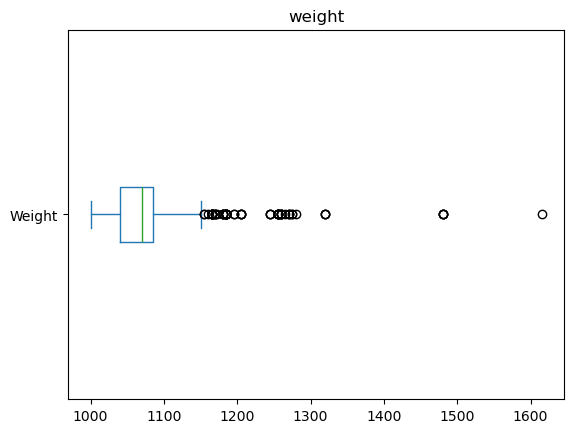

In [734]:
df["Weight"].plot(kind='box',vert=False,title='weight')

In [736]:
Q1=np.percentile(df["Weight"],25)
Q3=np.percentile(df["Weight"],75)
IQR=Q3-Q1
UWL=Q3+(1.5*IQR)
LWL=Q1-(1.5*IQR)
outliers=df[(df["Weight"]>UWL) | (df["Weight"]<LWL)]
print("Outliers in Price: ",len(outliers))
print("Outlier percentage: ",(len(outliers)/len(df))*100)

Outliers in Price:  66
Outlier percentage:  4.596100278551532


we are removing the outliers from price,km,cc,weight using iqr method 

In [28]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return np.where(series < lower, lower, 
           np.where(series > upper, upper, series))
for col in ["Price", "KM", "cc", "Weight"]:
    df[col] = cap_outliers(df[col])


### bar plots

<Axes: xlabel='Automatic'>

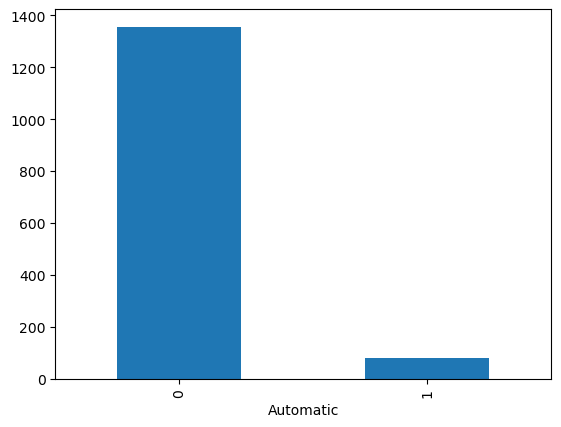

In [31]:
t=df["Automatic"].value_counts()
t.plot(kind='bar')

<Axes: xlabel='Fuel_Type'>

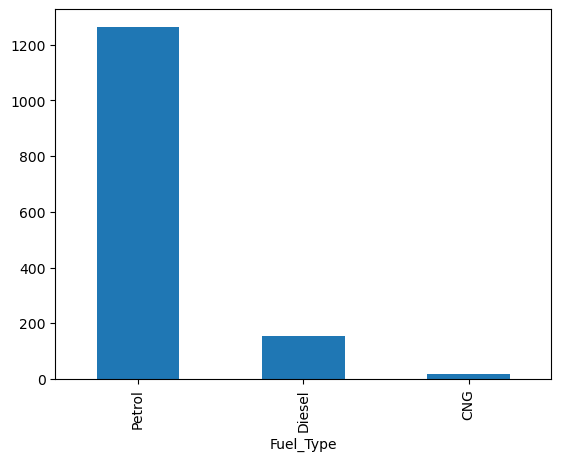

In [33]:
t=df["Fuel_Type"].value_counts()
t.plot(kind='bar')

<Axes: xlabel='Gears'>

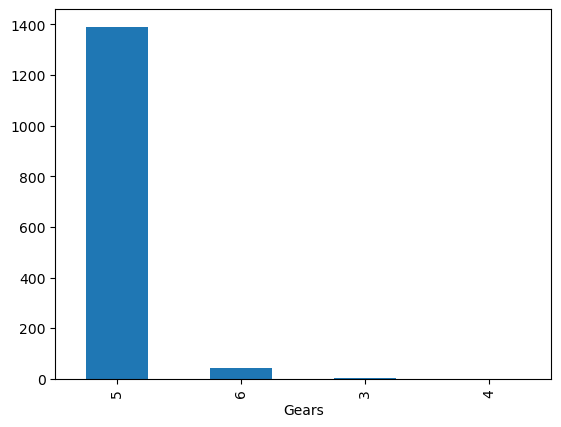

In [35]:
t=df["Gears"].value_counts()
t.plot(kind='bar')

<Axes: xlabel='Doors'>

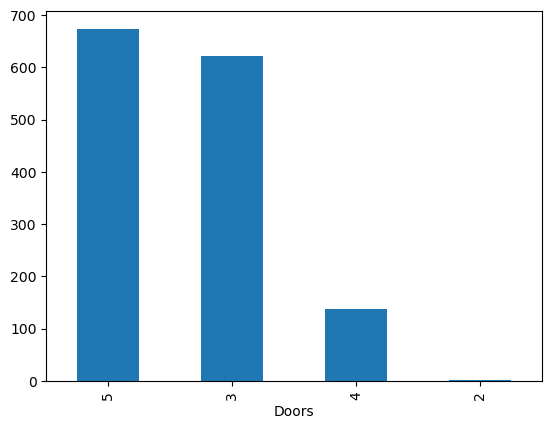

In [37]:
t=df["Doors"].value_counts()
t.plot(kind='bar')

### scatter plots

<function matplotlib.pyplot.show(close=None, block=None)>

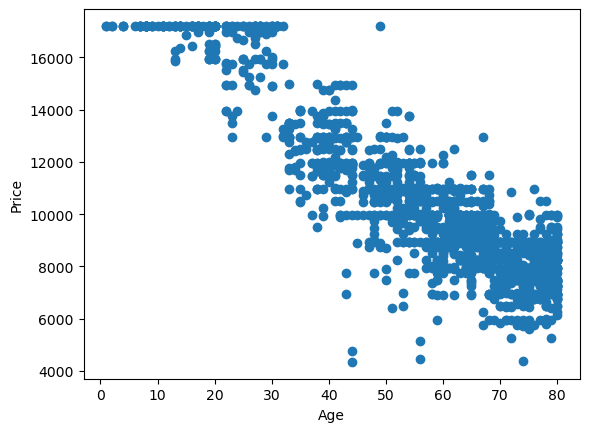

In [40]:
plt.scatter(df['Age_08_04'],df['Price'])
plt.ylabel("Price")
plt.xlabel("Age")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

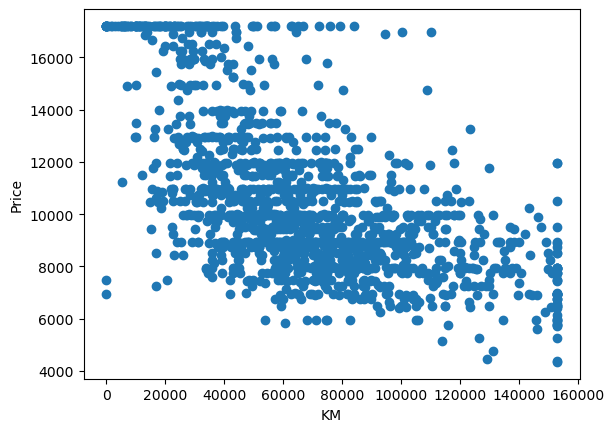

In [42]:
plt.scatter(df['KM'],df['Price'])
plt.ylabel("Price")
plt.xlabel("KM")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

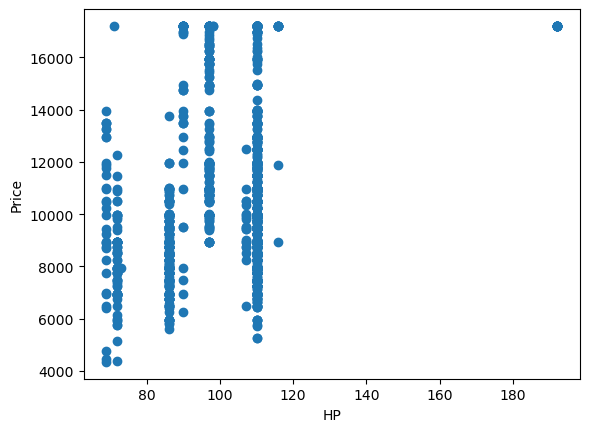

In [44]:
plt.scatter(df['HP'],df['Price'])
plt.ylabel("Price")
plt.xlabel("HP")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

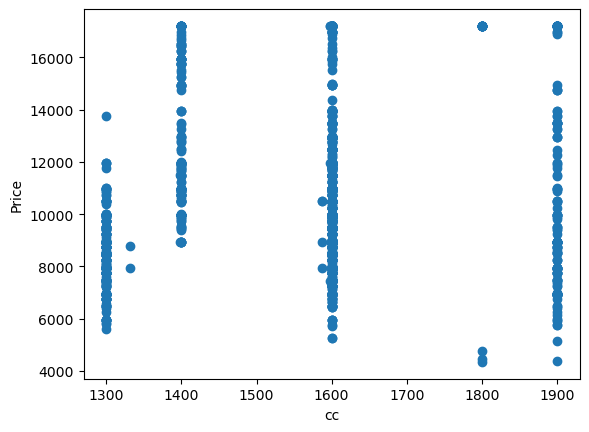

In [46]:
plt.scatter(df['cc'],df['Price'])
plt.ylabel("Price")
plt.xlabel("cc")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

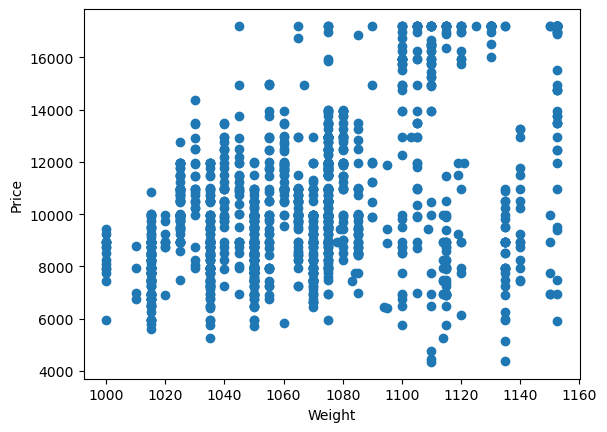

In [48]:
plt.scatter(df['Weight'],df['Price'])
plt.ylabel("Price")
plt.xlabel("Weight")
plt.show

as we are having only one constant value in everything we are removing the cylinders column

In [57]:
df=df.drop(columns='Cylinders')
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Gears', 'Weight'],
      dtype='object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


we are creationg dummies for fuel type 

In [62]:
df=pd.get_dummies(df,columns=["Fuel_Type"],drop_first=True)
df.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,True,False
1,13750,23,72937,90,0,2000,3,5,1165,True,False
2,13950,24,41711,90,0,2000,3,5,1165,True,False
3,14950,26,48000,90,0,2000,3,5,1165,True,False
4,13750,30,38500,90,0,2000,3,5,1170,True,False


we are having boolean for dummy variables so we are now changing them in to int 

In [67]:
df["Fuel_Type_Diesel"] = df["Fuel_Type_Diesel"].astype(int)
df["Fuel_Type_Petrol"] = df["Fuel_Type_Petrol"].astype(int)

In [69]:
from sklearn.preprocessing import StandardScaler

we are splitting the X and Y variables 

Y - price is the target variable

In [73]:
X = df.drop(columns=["Price"])
Y = df["Price"]

we are scaling the numerical variables 

In [76]:
SS=StandardScaler()
numeric_cols = ["Age_08_04", "KM", "HP", "Automatic", "cc", "Doors", "Gears", "Weight"]
model=StandardScaler()
X[numeric_cols]=model.fit_transform(X[numeric_cols])
X.head()

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,-1.771966,-0.574695,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561,1,0
1,-1.771966,0.117454,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561,1,0
2,-1.718184,-0.715386,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561,1,0
3,-1.610620,-0.547650,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561,1,0
4,-1.395491,-0.801028,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.853577,1,0


now we are splitting the data in to training and testing 

after that we checked for correaltion between the variables and next we are building the models from the correlation tables 

and evaluating the performance of the models using metrics
                     

### 2. Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

### 3. Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

### 4. Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [84]:
num_variables=['Price', 'Age_08_04', 'KM','HP','cc','Weight']
corr_matrix=df[num_variables].corr()
corr_matrix

,Price,Age_08_04,KM,HP,cc,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.335637
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,1.000000


here are the 5 models we got from the correlation table

price - age

price - age km

price - age km wt

price - age km wt hp 

price - age km wt hp cc

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error,r2_score
model=LinearRegression()

In [95]:
from sklearn.model_selection import train_test_split
Y=df["Price"]

In [97]:
X=df[["Age_08_04"]]
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)
model.fit(X_train,Y_train)
Y_train_pred=model.predict(X_train)
Y_test_pred=model.predict(X_test)
train_rmse=root_mean_squared_error(Y_train,Y_train_pred)
train_r2=r2_score(Y_train,Y_train_pred)
test_rmse=root_mean_squared_error(Y_test,Y_test_pred)
test_r2=r2_score(Y_test,Y_test_pred)
print("For price - age:")
print("Train RMSE:",np.round(train_rmse,3))
print("Train R2 score",np.round(train_r2,3))
print("Test RMSE:",np.round(test_rmse,3))
print("Test R2 score",np.round(test_r2,3))

For price - age:
Train RMSE: 1730.773
Train R2 score 0.771
Test RMSE: 1800.934
Test R2 score 0.757


In [99]:
X=df[["Age_08_04","KM"]]
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)
model.fit(X_train,Y_train)
Y_train_pred=model.predict(X_train)
Y_test_pred=model.predict(X_test)
train_rmse=root_mean_squared_error(Y_train,Y_train_pred)
train_r2=r2_score(Y_train,Y_train_pred)
test_rmse=root_mean_squared_error(Y_test,Y_test_pred)
test_r2=r2_score(Y_test,Y_test_pred)
print("For price - age km:")
print("Train RMSE:",np.round(train_rmse,3))
print("Train R2 score",np.round(train_r2,3))
print("Test RMSE:",np.round(test_rmse,3))
print("Test R2 score",np.round(test_r2,3))

For price - age km:
Train RMSE: 1649.486
Train R2 score 0.792
Test RMSE: 1710.44
Test R2 score 0.781


In [101]:
X=df[["Age_08_04","KM","Weight"]]
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)
model.fit(X_train,Y_train)
Y_train_pred=model.predict(X_train)
Y_test_pred=model.predict(X_test)
train_rmse=root_mean_squared_error(Y_train,Y_train_pred)
train_r2=r2_score(Y_train,Y_train_pred)
test_rmse=root_mean_squared_error(Y_test,Y_test_pred)
test_r2=r2_score(Y_test,Y_test_pred)
print("For price - age km wt:")
print("Train RMSE:",np.round(train_rmse,3))
print("Train R2 score",np.round(train_r2,3))
print("Test RMSE:",np.round(test_rmse,3))
print("Test R2 score",np.round(test_r2,3))

For price - age km wt:
Train RMSE: 1392.843
Train R2 score 0.852
Test RMSE: 1494.976
Test R2 score 0.832


In [103]:
X=df[["Age_08_04","KM","Weight","HP"]]
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)
model.fit(X_train,Y_train)
Y_train_pred=model.predict(X_train)
Y_test_pred=model.predict(X_test)
train_rmse=root_mean_squared_error(Y_train,Y_train_pred)
train_r2=r2_score(Y_train,Y_train_pred)
test_rmse=root_mean_squared_error(Y_test,Y_test_pred)
test_r2=r2_score(Y_test,Y_test_pred)
print("For price - age km wt hp:")
print("Train RMSE:",np.round(train_rmse,3))
print("Train R2 score",np.round(train_r2,3))
print("Test RMSE:",np.round(test_rmse,3))
print("Test R2 score",np.round(test_r2,3))

For price - age km wt hp:
Train RMSE: 1333.039
Train R2 score 0.864
Test RMSE: 1411.85
Test R2 score 0.851


In [105]:
X=df[["Age_08_04","KM","Weight","HP","cc"]]
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)
model.fit(X_train,Y_train)
Y_train_pred=model.predict(X_train)
Y_test_pred=model.predict(X_test)
train_rmse=root_mean_squared_error(Y_train,Y_train_pred)
train_r2=r2_score(Y_train,Y_train_pred)
test_rmse=root_mean_squared_error(Y_test,Y_test_pred)
test_r2=r2_score(Y_test,Y_test_pred)
print("For price - age km wt hp cc:")
print("Train RMSE:",np.round(train_rmse,3))
print("Train R2 score",np.round(train_r2,3))
print("Test RMSE:",np.round(test_rmse,3))
print("Test R2 score",np.round(test_r2,3))

For price - age km wt hp cc:
Train RMSE: 1332.312
Train R2 score 0.864
Test RMSE: 1412.786
Test R2 score 0.85


In [107]:
# Coefficients for the model
coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_
})

# Intercept
intercept = model.intercept_

print("Intercept:", intercept)
print("\nCoefficients:\n")
print(coefficients)

Intercept: -5510.157105059094

Coefficients:

     Feature  Coefficient
0  Age_08_04  -119.972882
1         KM    -0.020106
2     Weight    20.084383
3         HP    29.194964
4         cc    -0.100760


In [109]:
results = [
    {"Model": "Model 1", "Predictors": "Age", 
     "Train RMSE": 1328.73, "Train R²": 0.803, "Test RMSE": 1317.16, "Test R²": 0.798},
    
    {"Model": "Model 2", "Predictors": "Age, KM", 
     "Train RMSE": 1249.07, "Train R²": 0.826, "Test RMSE": 1213.56, "Test R²": 0.829},
    
    {"Model": "Model 3", "Predictors": "Age, KM, Weight", 
     "Train RMSE": 1156.27, "Train R²": 0.851, "Test RMSE": 1138.36, "Test R²": 0.849},
    
    {"Model": "Model 4", "Predictors": "Age, KM, Weight, HP", 
     "Train RMSE": 1125.37, "Train R²": 0.859, "Test RMSE": 1106.59, "Test R²": 0.857},
    
    {"Model": "Model 5", "Predictors": "Age, KM, Weight, HP, CC", 
     "Train RMSE": 1102.93, "Train R²": 0.864, "Test RMSE": 1087.96, "Test R²": 0.862},
]

df_results = pd.DataFrame(results)
print(df_results)

     Model               Predictors  Train RMSE  Train R²  Test RMSE  Test R²
0  Model 1                      Age     1328.73     0.803    1317.16    0.798
1  Model 2                  Age, KM     1249.07     0.826    1213.56    0.829
2  Model 3          Age, KM, Weight     1156.27     0.851    1138.36    0.849
3  Model 4      Age, KM, Weight, HP     1125.37     0.859    1106.59    0.857
4  Model 5  Age, KM, Weight, HP, CC     1102.93     0.864    1087.96    0.862


model 5 is the best fit as we can see low rmse and high r2

### 5. Apply Lasso and Ridge methods on the model.

Ridge regularization

In [118]:
from sklearn.linear_model import Lasso,Ridge

In [120]:
X = df[["Age_08_04", "KM", "Weight", "HP", "cc"]]
Y = df["Price"]

In [122]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [124]:
ridge=Ridge(alpha=1.0)
ridge.fit(X_train,Y_train)
ridge_train_pred=ridge.predict(X_train)
ridge_test_pred=ridge.predict(X_test)

In [126]:
ridge_train_rmse=root_mean_squared_error(Y_train,ridge_train_pred)
ridge_test_rmse=root_mean_squared_error(Y_test,ridge_test_pred)
ridge_train_r2=r2_score(Y_train,ridge_train_pred)
ridge_test_r2=r2_score(Y_test,ridge_test_pred)
print("Ridge Regularization")
print("Train RMSE:",np.round(ridge_train_rmse,3))
print("Train R2:",np.round(ridge_train_r2,3))
print("Test RMSE:",np.round(ridge_test_rmse,3))
print("Test R2:",np.round(ridge_test_r2,3))

Ridge Regularization
Train RMSE: 1332.312
Train R2: 0.864
Test RMSE: 1412.787
Test R2: 0.85


Lasso regularization

In [129]:
lasso=Lasso(alpha=0.01)
lasso.fit(X_train,Y_train)
lasso_train_pred=lasso.predict(X_train)
lasso_test_pred=lasso.predict(X_test)

In [131]:
lasso_train_rmse=root_mean_squared_error(Y_train,lasso_train_pred)
lasso_test_rmse=root_mean_squared_error(Y_test,lasso_test_pred)
lasso_train_r2=r2_score(Y_train,lasso_train_pred)
lasso_test_r2=r2_score(Y_test,lasso_test_pred)
print("Lasso Regularization")
print("Train RMSE:",np.round(lasso_train_rmse,3))
print("Train R2:",np.round(lasso_train_r2,3))
print("Test RMSE:",np.round(lasso_test_rmse,3))
print("Test R2:",np.round(lasso_test_r2,3))

Lasso Regularization
Train RMSE: 1332.312
Train R2: 0.864
Test RMSE: 1412.786
Test R2: 0.85


## ****Interview Questions:****

### 1. What is Normalization & Standardization and how is it helpful?
Normalization and Standardisation are techniques of data preprocessing used in macine learning to bring features to a sommon scale


****Normalization:****
* Nomalization scales data to a range 0 to 1

* It is useful for algorithms sensitive to feature sacles likes knn and helpfu when data is not normally distributed


****Standardization:****
* Standadization transform data to a standard normal distribution i.e., mean =0 and standard deviation = 1

* It is useful for algorithms like svm and when data is normally distributed


### 2. What techniques can be used to address multicollinearity in multiple linear regression?
Techniques like Ridge and Lasso regularizations can be used to address multicollinearity in multiple linear regression to shrink or select coefficients 
